In [14]:
# Carregamento do dataset 20 Newsgroups

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups

cats = ['alt.atheism', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes') )
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

X_train = np.array(newsgroups_train.data)
y_train = np.array(newsgroups_train.target)
X_test = np.array(newsgroups_test.data)
y_test = np.array(newsgroups_test.target)

In [3]:
newsgroups_train.target_names[y_train[18]]

'sci.space'

In [11]:
newsgroups_train.target_names

['alt.atheism', 'sci.space']

In [15]:
# Contagem de documentos de treino e teste por label

def conta_labels(y_train, y_test):
    """Retorna dataframe com os total de documentos em cada classe
    de treinamento e teste. Ref.: Cachopo (2007)"""
    y_train_classes = pd.DataFrame([newsgroups_train.target_names[i] for i in newsgroups_train.target])[0]
    y_test_classes = pd.DataFrame([newsgroups_test.target_names[i] for i in newsgroups_test.target])[0]
    
    contagem_df = pd.concat([y_train_classes.value_counts(),
                             y_test_classes.value_counts()],
                            axis=1, 
                            keys=["# docs treino", "# docs teste"], 
                            sort=False)
    
    contagem_df["# total docs"] = contagem_df.sum(axis=1)
    contagem_df.loc["Total"] = contagem_df.sum(axis=0)
    
    return contagem_df

newsgroups_df_labels = conta_labels(y_train, y_test)
newsgroups_df_labels

,# docs treino,# docs teste,# total docs
rec.sport.hockey,600,399,999
soc.religion.christian,599,398,997
rec.motorcycles,598,398,996
rec.sport.baseball,597,397,994
sci.crypt,595,396,991
rec.autos,594,396,990
sci.med,594,396,990
sci.space,593,394,987
comp.windows.x,593,395,988
sci.electronics,591,393,984


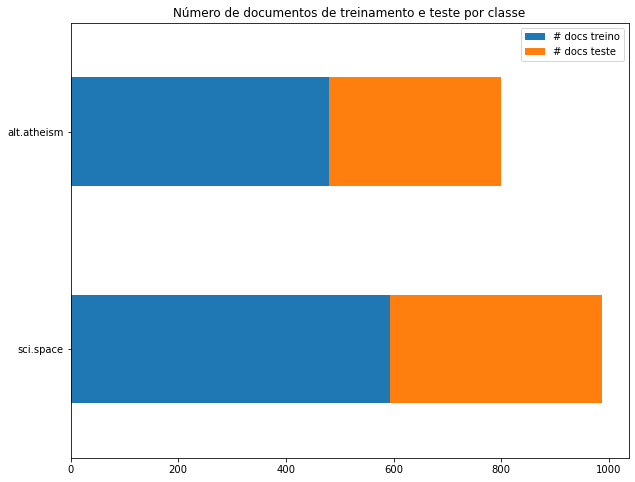

In [5]:
# Exibição no formato de gráfico
%matplotlib inline

newsgroups_df_labels.iloc[:-1,:-1].plot.barh(stacked=True, 
                                    figsize=(10, 8),
                                    title="Número de documentos de treinamento e teste por classe");

In [6]:
# Carregamento das bibliotecas comuns do sklearn

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics

In [16]:
# Classe de Pre-Processamento de textos utilizando a biblioteca NLTK

import string
import re
import nltk

class NLTKTokenizer():
    """Classe que recebe documentos como entrada e devolve realizado lematização
    e retirando stopwords e pontuacoes.
    Ref.: https://scikit-learn.org/stable/modules/feature_extraction.html
    """    
    def __init__(self):
        self.lemmatizer = nltk.stem.WordNetLemmatizer()
        self.stopwords = nltk.corpus.stopwords.words('english')
        self.english_words = set(nltk.corpus.words.words())
        self.pontuacao = string.punctuation

    def __call__(self, doc):
        # ETAPA 1 - Limpeza de texto
        # Converte para minúsculo
        doc = doc.lower()       
        
        # Trocar numeros pela string numero
        doc = re.sub(r'[0-9]+', 'numero', doc)
        
        # Trocar underlines por underline
        doc = re.sub(r'[_]+', 'underline', doc)

        # Trocar URL pela string httpaddr
        doc = re.sub(r'(http|https)://[^\s]*', 'httpaddr', doc)
        
        # Trocar Emails pela string emailaddr
        doc = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', doc) 
        
        # Remover caracteres especiais
        doc = re.sub(r'\\r\\n', ' ', doc)
        doc = re.sub(r'\W', ' ', doc)

        # Remove caracteres simples de uma letra
        doc = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc)
        doc = re.sub(r'\^[a-zA-Z]\s+', ' ', doc) 

        # Substitui multiplos espaços por um unico espaço
        doc = re.sub(r'\s+', ' ', doc, flags=re.I)
        
        # ETAPA 2 - Tratamento da cada palavra
        palavras = []
        for word in nltk.word_tokenize(doc):
            if word in self.stopwords:
                continue
            if word in self.pontuacao:
                continue
            if word not in self.english_words:
                continue
            
            word = self.lemmatizer.lemmatize(word)
            palavras.append(word)
        
        return palavras

In [8]:
# Vetores de características sem tratamento com NLTK e Expressões Regulares

vetorizador = CountVectorizer()
v1 = vetorizador.fit_transform(X_train)

features = vetorizador.get_feature_names()
v1_df = pd.DataFrame(v1.toarray(), columns = features)
v1_df

,00,000,0000,00000,000000,000062david42,00041032,0004136,0004246,0004422,...,zullen,zulu,zur,zurbrin,zus,zwaartepunten,zwak,zwakke,zware,zwarte
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1071,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Vetores de características com NLTK (lematização, remoção de stopwords e palavras desconhecidas)

vetorizador_tratado = CountVectorizer(tokenizer=NLTKTokenizer())
v2 = vetorizador_tratado.fit_transform(X_train)

features = vetorizador_tratado.get_feature_names()
v2_df = pd.DataFrame(v2.toarray(), columns = features)
v2_df

,aa,aam,aba,abandon,abandoned,abatement,abbey,abbot,abbreviation,abdication,...,zombie,zonal,zone,zoning,zoo,zooid,zoological,zoology,zoom,zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train

array([': \n: >> Please enlighten me.  How is omnipotence contradictory?\n: \n: >By definition, all that can occur in the universe is governed by the rules\n: >of nature. Thus god cannot break them. Anything that god does must be allowed\n: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts\n: >the rules of nature.\n: \n: Obviously, an omnipotent god can change the rules.\n\nWhen you say, "By definition", what exactly is being defined;\ncertainly not omnipotence. You seem to be saying that the "rules of\nnature" are pre-existant somehow, that they not only define nature but\nactually cause it. If that\'s what you mean I\'d like to hear your\nfurther thoughts on the question.',
       "In <19APR199320262420@kelvin.jpl.nasa.gov> baalke@kelvin.jpl.nasa.gov \n\nSorry I think I missed a bit of info on this Transition Experiment. What is it?\n\nWill this mean a loss of data or will the Magellan transmit data later on ??\n\nBTW: When will NASA cut off the connection 

In [18]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

text_clf_knn = Pipeline([('vect', CountVectorizer(tokenizer=NLTKTokenizer())),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier(n_neighbors=5, 
                                                  weights='uniform', 
                                                  algorithm='auto', 
                                                  leaf_size=30, 
                                                  p=2, 
                                                  metric='minkowski', 
                                                  metric_params=None, 
                                                  n_jobs=None)),
                     ])

text_clf_knn.fit(X_train, y_train)
predicted = text_clf_knn.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.06      0.17      0.09       319
           1       0.08      0.22      0.11       389
           2       0.08      0.22      0.11       394
           3       0.11      0.12      0.12       392
           4       0.06      0.11      0.08       385
           5       0.36      0.08      0.14       395
           6       0.17      0.14      0.15       390
           7       0.06      0.09      0.07       396
           8       0.12      0.07      0.09       398
           9       0.10      0.13      0.11       397
          10       0.15      0.14      0.15       399
          11       0.07      0.02      0.03       396
          12       0.10      0.03      0.05       393
          13       0.08      0.03      0.04       396
          14       0.17      0.05      0.07       394
          15       0.08      0.01      0.01       398
          16       0.08      0.02      0.03       364
          17       0.19    

In [19]:
import joblib

In [20]:
filename = 'finalized_model.sav'
joblib.dump(text_clf_knn, filename)

['finalized_model.sav']